In this demonstration we'll look at a sample example, which would be following the same procedure through which the assignment problem can be solved

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [6]:
#Let's read the dataset first
dat = pd.read_csv('https://query.data.world/s/fgpmczptzlakpvpcuuoxrotp65hsjl')
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dat['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [ ]:
# We will try to cluster the data into some similar types of species

In [8]:
## Let's drop species column as this is a label column and we don't need it in case of unsupervised learning models
dat.drop('species',axis=1,inplace=True)
dat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Now, we need to create a ID columns, without this we will not be able to make necessary conclusions or we will not be able to
# identify that which observation goes to which cluster

# At the end of the clusterng, I want to know which flower goes into which cluster
dat['ID'] = dat.index+100
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [11]:
# Let's check the shape again
dat.shape

(150, 5)

In [10]:
# Also, check the info again
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
ID              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Question-1:

Check if the data have some null values?

In [12]:
# Number of nulls per column
dat.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
ID              0
dtype: int64

### Let's begin with analysis part 

### 1. Principal Component Analysis

In [13]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
ID = dat['ID']

In [14]:
# Now let's drop the ID column as it is not a predictor in our data.
dat1 = dat.drop('ID',axis=1)

In [15]:
# Let's check the info about the data
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


## Question-2: 

In the below cell use standard scaler to standardise the data

After this, check what is the maximum value in the array we have?

In [22]:
## Let's scale the data with 4 columns
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(dat)
dat2.shape

(150, 5)

In [23]:
# Check maximum value here
dat2.max().round(2)

3.11

## Question-3 & 4: 

Now, we will perfrom PCA on the data we have, use svd_solver as randomized and random_state as 42

After this, check pca.components_, this will basically give you the all the vectors of the new feature space. Now check the first vector and check the first coponent of it.

- What is the first coponent of the first vector obtained from pca.components_?
- What is the variance explained by the first principa component?

In [ ]:
# Sampling: 100  --- 50
# random state=int
# it acts as indicator or tag

In [24]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state=42)
# PCA: Eigen Decomposition method to get PCA
# PCA: another method "single value decomposition"

In [25]:
#Performing the PCA
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
# PCA
# Variance 


In [31]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[ 0.44844975, -0.23195044,  0.51079205,  0.5024696 ,  0.48136016],
       [ 0.38285827,  0.92007839,  0.03074857,  0.07356757, -0.02275157],
       [-0.64520569,  0.27427786, -0.13238322,  0.19127876,  0.67406853],
       [-0.40999945,  0.09491665,  0.28817343,  0.65305918, -0.55978662],
       [-0.26061932,  0.12416613,  0.79848404, -0.52824072,  0.0067323 ]])

In [32]:
pca.components_[0][0]

0.44844974920019093

In [30]:
#What is the variance explained by the first principa component
# ratio gives the variance explained by an individual PC over the total variance

pca.explained_variance_ratio_

array([0.7470533 , 0.18435257, 0.04682624, 0.01764767, 0.00412021])

Text(0, 0.5, 'Cumulative Variance')

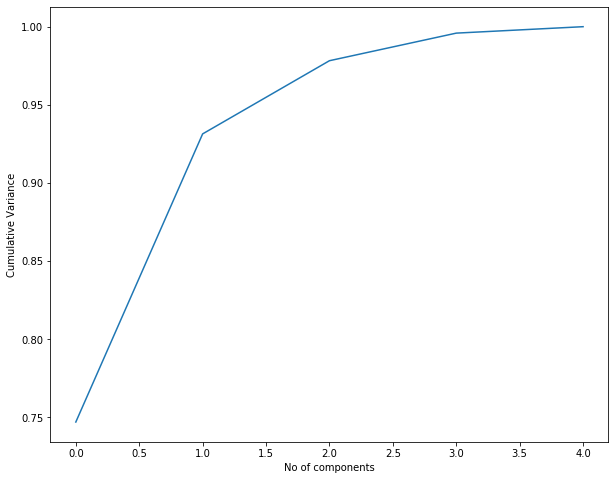

In [33]:
#Plotting the scree plot
%matplotlib inline
fig=plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel('Cumulative Variance')

## Question-5:

Choose the correct number of PCA from the cumulative variance plot.

What is the number of PCs we can go about?

In [0]:
# What is the number of PCs we can go about?

# Answer here: 2

In [47]:
100*dat.drop('ID',axis=1).var()/sum(dat.drop('ID',axis=1).var())

sepal_length    15.006562
sepal_width      4.114512
petal_length    68.132654
petal_width     12.746273
dtype: float64

In [ ]:
## PCA: You get componets that are linear combination of original features
## PC1: combination of some original features
## PC1 = ORIGINAL =----WRONG

### Run the PCA with the components choosed above

In [34]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [35]:
# Transform the data here
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(150, 2)

In [41]:
dat.iloc[:,:2].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [42]:
df_pca

array([[-2.81523374,  0.50780148],
       [-2.64381157, -0.64904242],
       [-2.87840736, -0.32028277],
       [-2.80968411, -0.5766571 ],
       [-2.87927452,  0.67087841],
       [-2.59251492,  1.51984806],
       [-2.90108089,  0.06667267],
       [-2.7092994 ,  0.24582216],
       [-2.78468857, -1.10037753],
       [-2.64616924, -0.44936611],
       [-2.61997047,  1.06893302],
       [-2.74479639,  0.15134096],
       [-2.6427054 , -0.71244982],
       [-2.9911302 , -0.9529531 ],
       [-2.60695676,  1.88596608],
       [-2.64614878,  2.71299866],
       [-2.58739587,  1.50563887],
       [-2.56119963,  0.50663898],
       [-2.29776746,  1.43022943],
       [-2.6714905 ,  1.14465644],
       [-2.28963909,  0.42878254],
       [-2.52945124,  0.94047952],
       [-3.0144526 ,  0.46470762],
       [-2.16763852,  0.10246814],
       [-2.51370009,  0.14857635],
       [-2.2658033 , -0.61368493],
       [-2.3379444 ,  0.25478656],
       [-2.43318175,  0.53944877],
       [-2.39740759,

In [36]:
# Print the resultant PCs here
df_pca[:10]

array([[-2.81523374,  0.50780148],
       [-2.64381157, -0.64904242],
       [-2.87840736, -0.32028277],
       [-2.80968411, -0.5766571 ],
       [-2.87927452,  0.67087841],
       [-2.59251492,  1.51984806],
       [-2.90108089,  0.06667267],
       [-2.7092994 ,  0.24582216],
       [-2.78468857, -1.10037753],
       [-2.64616924, -0.44936611]])

In [37]:
#Creating a transpose so that the each column is properly arranged
pc=np.transpose(df_pca)

In [44]:
pc[0]

array([-2.81523374, -2.64381157, -2.87840736, -2.80968411, -2.87927452,
       -2.59251492, -2.90108089, -2.7092994 , -2.78468857, -2.64616924,
       -2.61997047, -2.74479639, -2.6427054 , -2.9911302 , -2.60695676,
       -2.64614878, -2.58739587, -2.56119963, -2.29776746, -2.6714905 ,
       -2.28963909, -2.52945124, -3.0144526 , -2.16763852, -2.51370009,
       -2.2658033 , -2.3379444 , -2.43318175, -2.39740759, -2.49252996,
       -2.37321021, -2.09410144, -2.76704067, -2.60959921, -2.36977443,
       -2.37942413, -2.22866121, -2.33660705, -2.5359805 , -2.30109212,
       -2.39046199, -2.00541129, -2.59944142, -2.07166671, -2.21251539,
       -2.14569299, -2.40994607, -2.40619495, -2.25427228, -2.22023774,
        0.68720708,  0.37956967,  0.83307176,  0.11867277,  0.7116508 ,
        0.12603632,  0.45091764, -0.61960018,  0.62428258, -0.15666443,
       -0.25839539,  0.23833109,  0.34586963,  0.50266125, -0.14483852,
        0.65624926,  0.2177153 ,  0.05221821,  0.99709472,  0.08

In [38]:
# Create a dataframe with the PCs obtained
pca_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [48]:
# Check the head of the resultant data
pca_df2.head()

,PC1,PC2
0,-2.815234,0.507801
1,-2.643812,-0.649042
2,-2.878407,-0.320283
3,-2.809684,-0.576657
4,-2.879275,0.670878


In [49]:
#Let's add back the ID to the given principal components
pca_df2 = pd.DataFrame({'ID': list(ID),'PC1':pc[0],'PC2':pc[1]})
pca_df2.head()

,ID,PC1,PC2
0,100,-2.815234,0.507801
1,101,-2.643812,-0.649042
2,102,-2.878407,-0.320283
3,103,-2.809684,-0.576657
4,104,-2.879275,0.670878


### Let's perfrom Outlier treatment

<function matplotlib.pyplot.show(*args, **kw)>

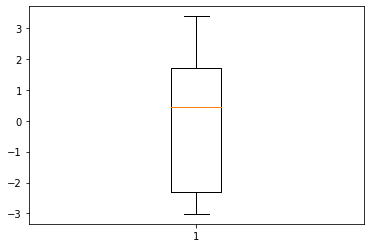

In [51]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
# IQR: Inter quntile tange method
# For PC1
plt.boxplot(pca_df2.PC1)
plt.show

In [61]:
Q1=pca_df2.PC1.quantile(0.05)
Q3=pca_df2.PC1.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC1 >=Q1) & (pca_df2.PC1 <=Q3)]

In [62]:
# For PC2
Q1=pca_df2.PC2.quantile(0.05)
Q3=pca_df2.PC2.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC2 >=Q1) & (pca_df2.PC2 <=Q3)]

In [0]:
#Let's visualise the resultant PCs


## Clustering 

In [57]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

## Question 6:

Is the given data good for performing Clustering?

In [66]:
#Let's check the Hopkins measure
hopkins(pca_df2.drop('ID',axis=1))

0.7706114166524389

In [0]:
#Answer here: 

In [59]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
dat3_1=pca_df2.drop('ID',axis=1)

In [60]:
# Check the shape of the resultant data
dat3_1.shape

(120, 2)

### K- means Clustering

## Question-7: Look at the silhouette score plot and choose the optimal number of cluster

In [68]:
#First we'll do the silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
  

For n_clusters=2, the silhouette score is 0.6661213527336394
For n_clusters=3, the silhouette score is 0.5333925553239417
For n_clusters=4, the silhouette score is 0.5156461785792028
For n_clusters=5, the silhouette score is 0.5506646057802683
For n_clusters=6, the silhouette score is 0.4982860975547413
For n_clusters=7, the silhouette score is 0.49640383572347446
For n_clusters=8, the silhouette score is 0.505143429867493


In [70]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(dat3_1)
    ss.append([k,silhouette_score(dat3_1,kmeans.labels_)])

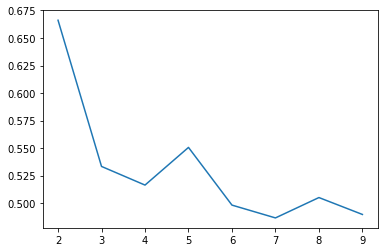

In [71]:
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [ ]:
# In Silhouette we look for peak,here it is 2

## Question-8: Look at the Elbow Curve plot and choose the optimal number of cluster

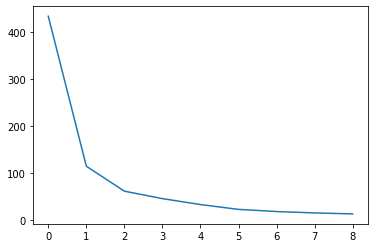

In [74]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter=50)
    model=model.fit(dat3_1)
    ssd.append(model.inertia_)
   
plt.plot(ssd)

## KMeans with the K the we have choosed

In [75]:
#Let's perform K means using K=
model_clus2 = KMeans(n_clusters=2,max_iter=50,random_state=50)
model_clus2.fit(dat3_1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [78]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index',axis=1),pd.Series(model_clus2.labels_)],axis=1)
dat_km.columns = ['ID','PC1','PC2','ClusterID']
dat_km.head()

,ID,PC1,PC2,ClusterID
0,117.0,-2.561200,0.506639,1
1,120.0,-2.289639,0.428783,1
2,121.0,-2.529451,0.940480,1
3,123.0,-2.167639,0.102468,1
4,124.0,-2.513700,0.148576,1


In [79]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts()

0    85
1    35
Name: ClusterID, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

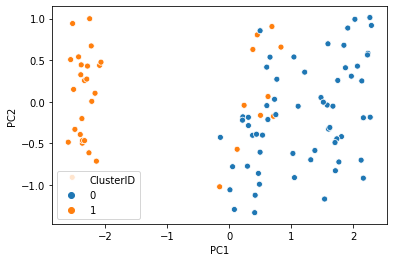

In [86]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x='PC1',y='PC2', hue = 'ClusterID',legend='full',data=dat_km)
plt.show

## Cluster Profiling

In [91]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(dat,dat_km,how='inner',on='ID')
dat5.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,PC1,PC2,ClusterID
0,5.1,3.5,1.4,0.3,117,-2.561200,0.506639,1
1,5.4,3.4,1.7,0.2,120,-2.289639,0.428783,1
2,5.1,3.7,1.5,0.4,121,-2.529451,0.940480,1
3,5.1,3.3,1.7,0.5,123,-2.167639,0.102468,1
4,4.8,3.4,1.9,0.2,124,-2.513700,0.148576,1


In [92]:
# Let's drop PCs from the data
dat5.drop(['PC1','PC2'],axis=1,inplace=True)
dat5.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,ClusterID
0,5.1,3.5,1.4,0.3,117,1
1,5.4,3.4,1.7,0.2,120,1
2,5.1,3.7,1.5,0.4,121,1
3,5.1,3.3,1.7,0.5,123,1
4,4.8,3.4,1.9,0.2,124,1


#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [93]:
dat5.groupby(['ClusterID']).sepal_length.mean()

ClusterID
0    6.160656
1    5.351429
Name: sepal_length, dtype: float64

In [94]:
# Let's profile the cluster by taking the mean of various attributes
sepal_l = pd.DataFrame(dat5.groupby(['ClusterID']).sepal_length.mean())
sepal_w = pd.DataFrame(dat5.groupby(['ClusterID']).sepal_width.mean())
petal_l = pd.DataFrame(dat5.groupby(['ClusterID']).petal_length.mean())
petal_w = pd.DataFrame(dat5.groupby(['ClusterID']).petal_width.mean())

In [95]:
# Let's concat the resultant with the Cluster ID columns
df = pd.concat([sepal_l,sepal_w,petal_l,petal_w],axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width
ClusterID,,,,
0,6.160656,2.881967,4.855738,1.659016
1,5.351429,3.225714,2.357143,0.594286


In [0]:
# Let's add column name to it


## Finding the observations that belong to certain cluster

In [0]:
#Let's say my problem statement here is to just the find the flowers which have a very low petal length and petal width.
#Here's how you can make up for the outlier analysis that you did earlier.
#So you can choose those cluster means as cut offs and find the final list of flowers.

In [96]:
#Let's use the concept of binning
dat5[dat5['ClusterID'] == 1]['ID']

0     117
1     120
2     121
3     123
4     124
5     125
6     126
7     127
8     128
9     129
10    130
11    131
12    134
13    135
14    136
15    137
16    138
17    139
18    140
19    142
20    143
21    145
22    147
23    148
24    149
25    150
26    151
27    152
28    154
29    155
30    156
31    158
32    159
33    161
34    163
Name: ID, dtype: int64